<a href="https://colab.research.google.com/github/samuel-haddad/Simulations/blob/main/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distributions
Sources: 
- https://www.datadriveninvestor.com/2020/05/20/simulating-popular-distributions-in-python/
-https://towardsdatascience.com/bernoulli-distribution-with-python-from-scratch-89fda3c822b
- Curso Estatística para Ciência de Dados: Teoria e Prática com Python (Prof. Dr. Francisco Rodrigues)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import random # biblioteca para gerar números aleatórios

#from scipy import stats
from scipy.stats import bernoulli

# plots setup
plt.rcParams['axes.titlepad']=15

rc = {'axes.titlesize':18,
      'axes.titleweight':'bold',
      'axes.labelsize':12,
      }

sns.set_context(context='notebook', rc=rc)
sns.set_style("whitegrid", rc=rc)

## Classics

### Uniform
https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

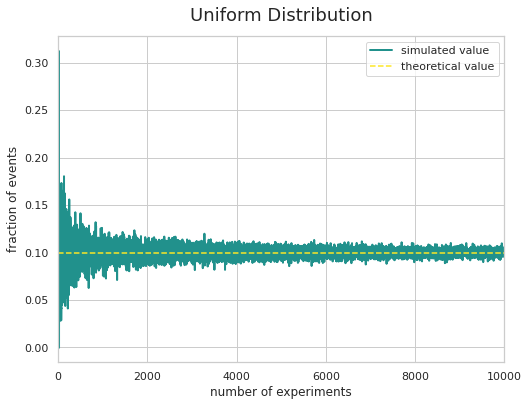

Theoretical value of probability: 0.1


In [ ]:
# set random number for reproducibility
np.random.seed(123)

# uniform distribution
s = np.random.uniform(0,10,10)

# theorical value
a=0
for i in s:
    if i == s[0]:
        a +=1
    else:
        a +=0

valor_teorico = a/len(s)


vp = [] # list that stores the fraction of occurrences as a function of the number of nsim simulations
vsim = [] # list that stores the number of simulations
Nmax = 10000 # maximum number of simulations
for nsim in np.arange(1,Nmax,1):
    n = 0 # number of occurrences of events
    for i in range(1,nsim):
        position = random.randint(0,len(s)-1)
        if(s[position] == s[0]):
            n = n + 1        
    vp.append(n/nsim)
    vsim.append(nsim)

plt.figure(figsize=(8,6))
plt.plot(vsim, vp, linestyle='-', color="#21918c", linewidth=2,label = 'simulated value')
plt.axhline(y=valor_teorico, color='#fde725', linestyle='--', label = 'theoretical value')
plt.title("Uniform Distribution")
plt.ylabel("fraction of events")
plt.xlabel("number of experiments")
plt.xlim([0.0, Nmax])
#plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True) 

print('Theoretical value of probability:', valor_teorico)

### Normal Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

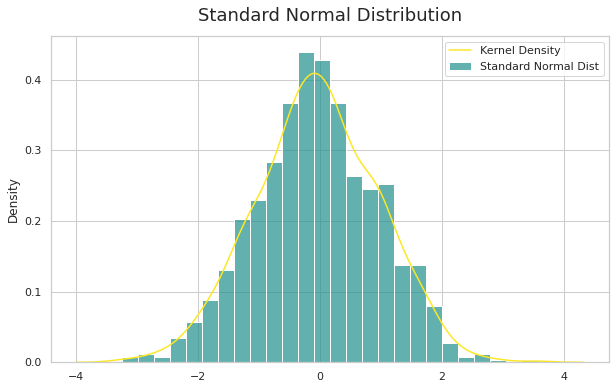

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# simulate normal dist (Std normal: loc = center of distribution and scale = std deviation)
s = np.random.normal(loc=0, scale=1, size=1000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725')

plt.legend(labels=['Kernel Density','Standard Normal Dist'])
plt.title("Standard Normal Distribution")
plt.show(block=False)

### Laplace Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.laplace.html

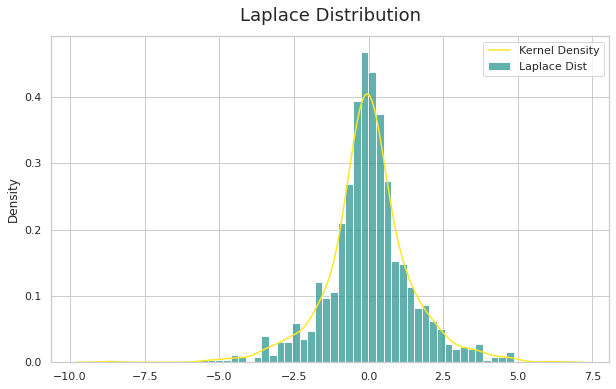

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# laplace distribution
s = np.random.laplace(loc=0, scale=1, size=1000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725')

plt.legend(labels=['Kernel Density','Laplace Dist'])
plt.title("Laplace Distribution")
plt.show(block=False)

### Bernoulli Distribution
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html
https://github.com/franciscoicmc/probabilidades/blob/main/aula14-montecarlo.ipynb

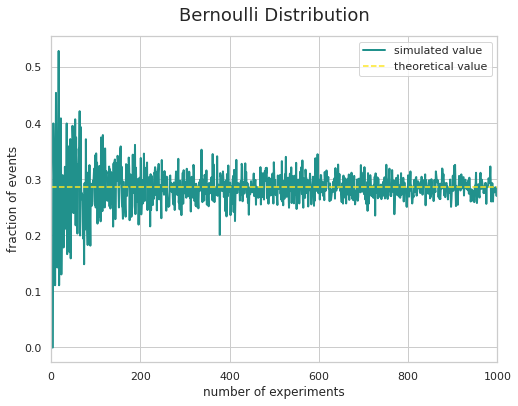

Theoretical value of probability: 0.286


In [ ]:
# set random number for reproducibility
np.random.seed(123)

# bernoulli simulation
p = 0.3 # probability of occurrence of the event
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
s = bernoulli.rvs(p, size=1000) 

# theorical value
valor_teorico = 0
for i in s:
    if (i == 1):
        valor_teorico = valor_teorico + 1
valor_teorico = valor_teorico/len(s)


vp = [] # list that stores the fraction of occurrences as a function of the number of nsim simulations
vsim = [] # list that stores the number of simulations
Nmax = 1000 # maximum number of simulations
for nsim in np.arange(1,Nmax,1):
    n = 0 # number of occurrences of events
    for i in range(1,nsim):
        position = random.randint(0,len(s)-1)
        if(s[position] == 1):
            n = n + 1        
    vp.append(n/nsim)
    vsim.append(nsim)

plt.figure(figsize=(8,6))
plt.plot(vsim, vp, linestyle='-', color="#21918c", linewidth=2,label = 'simulated value')
plt.axhline(y=valor_teorico, color='#fde725', linestyle='--', label = 'theoretical value')
plt.title("Bernoulli Distribution")
plt.ylabel("fraction of events")
plt.xlabel("number of experiments")
plt.xlim([0.0, Nmax])
#plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True) 

print('Theoretical value of probability:', valor_teorico)

### Geometric Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.geometric.html

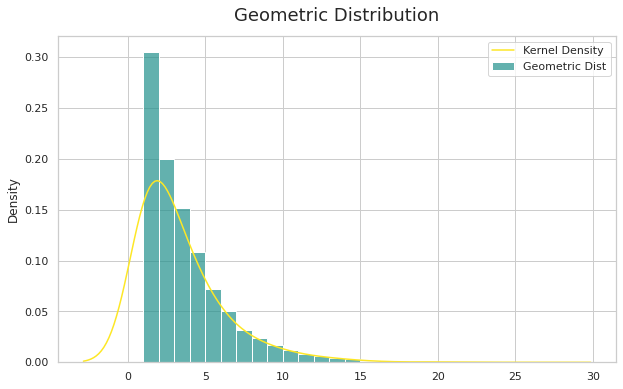

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# geometric distribution
p =.3
s = np.random.geometric(p, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c', binwidth=1)
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Geometric Dist'])
plt.title("Geometric Distribution")
plt.show(block=False)

### Hypergeometric Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.hypergeometric.html

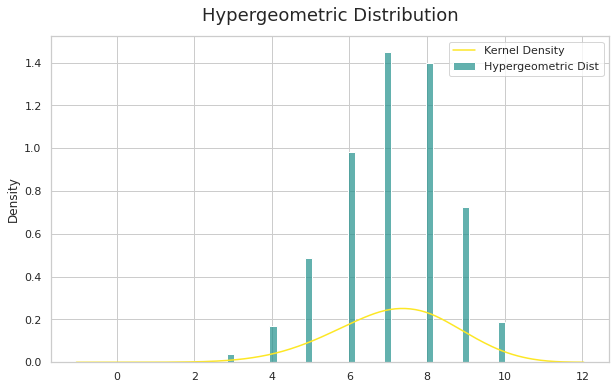

In [29]:
# set random number for reproducibility
np.random.seed(123)

# hypergeometric distribution
s = np.random.hypergeometric(ngood=1000, nbad=400, nsample=10, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Hypergeometric Dist'])
plt.title("Hypergeometric Distribution")
plt.show(block=False)

### Binomial Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

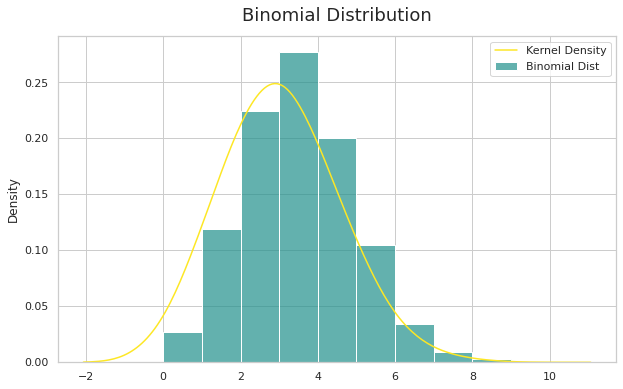

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# binomial distribution
n, p = 10, .3
s = np.random.binomial(n, p, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c', binwidth=1)
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Binomial Dist'])
plt.title("Binomial Distribution")
plt.show(block=False)

### Negative Binomial Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.negative_binomial.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html

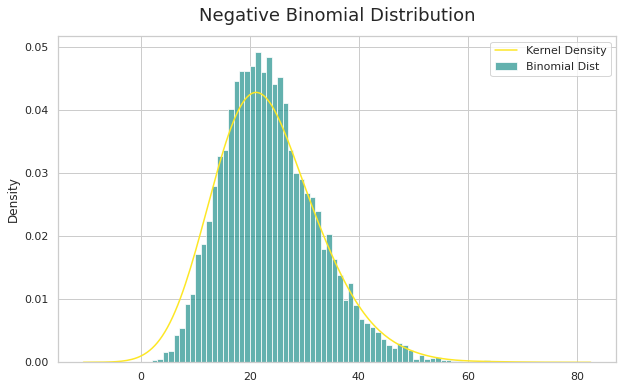

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# negative binomial distribution
n, p = 10, .3
s = np.random.negative_binomial(n, p, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c', binwidth=1)
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Binomial Dist'])
plt.title("Negative Binomial Distribution")
plt.show(block=False)

### Poisson Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

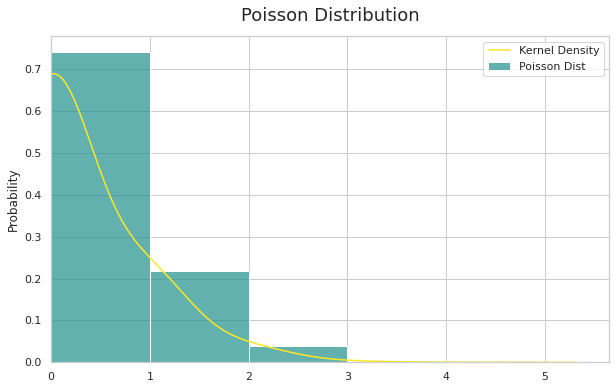

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# poisson distribution
lam = .3
s = np.random.poisson(lam, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='probability', alpha=0.7, color='#21918c', binwidth=1)
ax = sns.kdeplot(s, color='#fde725', bw_adjust=5)
ax.set(xlim=(0))

plt.legend(labels=['Kernel Density','Poisson Dist'])
plt.title("Poisson Distribution")
plt.show(block=False)

### Exponential Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html

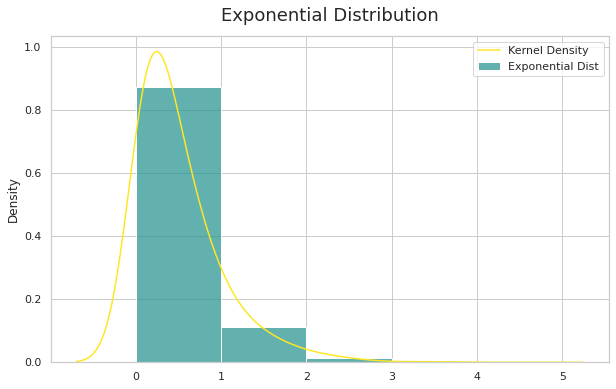

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# exponential distribution
s = np.random.exponential(scale=.5, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c', binwidth=1)
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Exponential Dist'])
plt.title("Exponential Distribution")
plt.show(block=False)

### Power Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.power.html

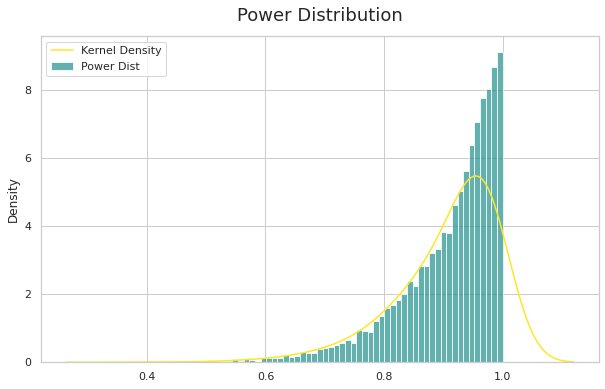

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# power distribution - samples in [0, 1]
s = np.random.power(a=10, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Power Dist'])
plt.title("Power Distribution")
plt.show(block=False)

### Gamma Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html

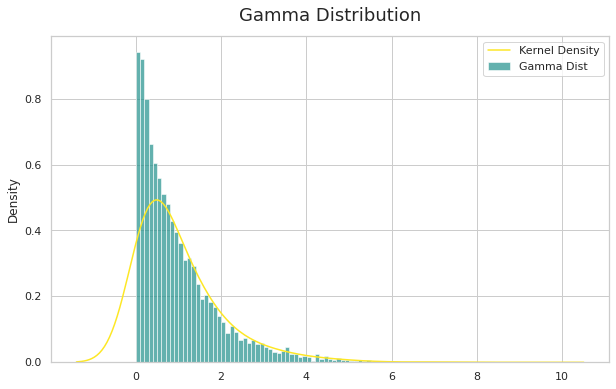

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# gamma distribution -  shape (sometimes designated “k”) and scale (sometimes designated “theta”)
s = np.random.gamma(shape=1, scale=1, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Gamma Dist'])
plt.title("Gamma Distribution")
plt.show(block=False)

### Beta Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html

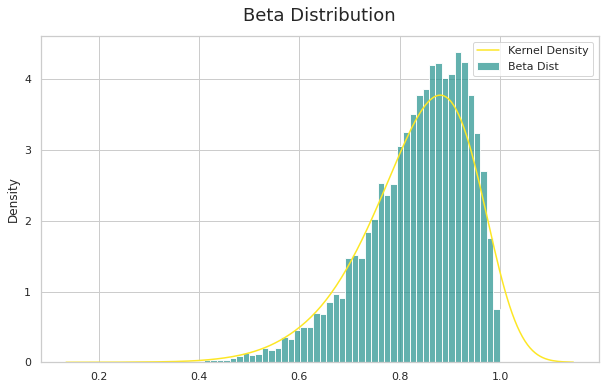

In [48]:
# set random number for reproducibility
np.random.seed(123)

# beta distribution -  shape (sometimes designated “k”) and scale (sometimes designated “theta”)
s = np.random.beta(a=10, b=2, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Beta Dist'])
plt.title("Beta Distribution")
plt.show(block=False)

### Pareto Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html

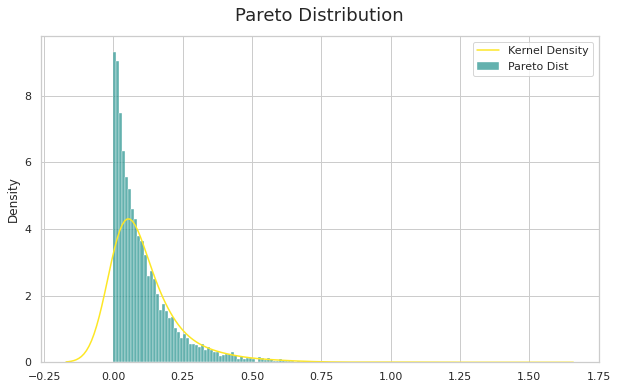

In [22]:
# set random number for reproducibility
np.random.seed(123)

# pareto distribution -  a = shape of the distribution. Must be positive.
s = np.random.pareto(a=10, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Pareto Dist'])
plt.title("Pareto Distribution")
plt.show(block=False)

### Weibull Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.weibull.html

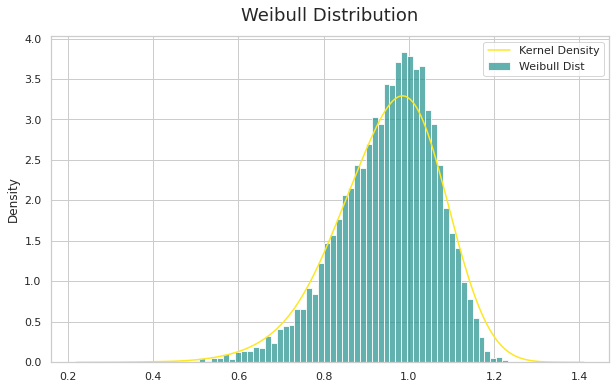

In [ ]:
# set random number for reproducibility
np.random.seed(123)

# weibull distribution -  a = shape of the distribution. Must be positive.
s = np.random.weibull(a=10, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Weibull Dist'])
plt.title("Weibull Distribution")
plt.show(block=False)

### Distributions plot

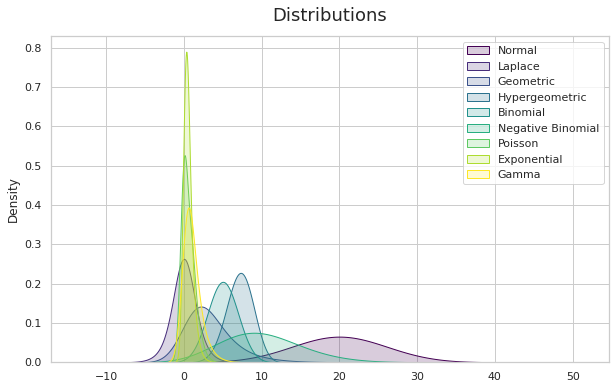

In [42]:
# set random number for reproducibility
np.random.seed(123)

# general params
size = 100000
bw_adjust=7

# normal distribution
normal = np.random.normal(loc=20, scale=5, size=size)

# laplace distribution
laplace = np.random.laplace(loc=0, scale=1, size=size)

# geometric distribution
geometric = np.random.geometric(p=.3, size=size)

# hypergeometric distribution
hypergeometric = np.random.hypergeometric(ngood=1000, nbad=400, nsample=10, size=size)

# binomial distribution
binomial = np.random.binomial(n=10, p=.5, size=size)

# negative binomial distribution
nbinomial = np.random.negative_binomial(n=10, p=.5, size=size)

# poisson distribution
poisson = np.random.poisson(lam=.5, size=size)

# exponential distribution
exponential = np.random.exponential(scale=.5, size=size)

# plot
kde_list = [normal, laplace, geometric, hypergeometric, binomial, nbinomial, poisson, exponential, gamma]
labels=['Normal','Laplace', 'Geometric', 'Hypergeometric', 'Binomial','Negative Binomial','Poisson', 'Exponential', 'Gamma']
viridis = cm.get_cmap('viridis', len(kde_list))

fig = plt.figure(figsize=(10,6))

for kde, color in zip(kde_list, viridis.colors):
    ax = sns.kdeplot(kde, color=color, bw_adjust=bw_adjust, fill=True, alpha=.2)

plt.legend(labels=labels)
plt.title("Distributions")
plt.show(block=False)

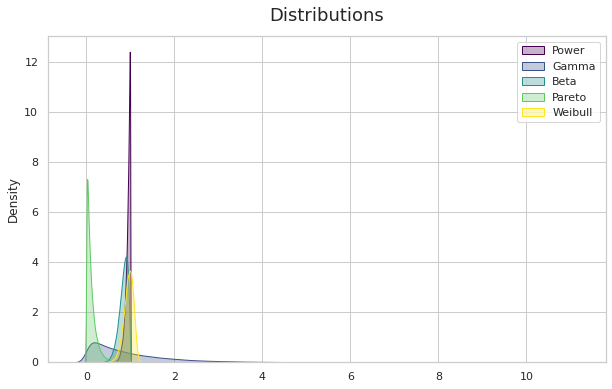

In [47]:
# set random number for reproducibility
np.random.seed(123)

# general params
size = 100000
bw_adjust=1

# power distribution - samples in [0, 1]
power = np.random.power(a=15, size=size)

# gamma distribution -  shape (sometimes designated “k”) and scale (sometimes designated “theta”)
gamma = np.random.gamma(shape=1, scale = 1, size=size)

# beta distribution -  shape (sometimes designated “k”) and scale (sometimes designated “theta”)
beta = np.random.beta(a=10, b=2, size=size)

# pareto distribution -  a = shape of the distribution. Must be positive.
pareto = np.random.pareto(a=10, size=size)

# weibull distribution -  a = shape of the distribution. Must be positive.
weibull = np.random.weibull(a=10, size=size)

# plot
kde_list = [power, gamma, beta, pareto, weibull]
labels=['Power', 'Gamma', 'Beta', 'Pareto', 'Weibull']
viridis = cm.get_cmap('viridis', len(kde_list))

fig = plt.figure(figsize=(10,6))

for kde, color in zip(kde_list, viridis.colors):
    ax = sns.kdeplot(kde, color=color, bw_adjust=bw_adjust, fill=True, alpha=.3)

plt.legend(labels=labels)
plt.title("Distributions")
plt.show(block=False)

## Statistical test distributions

### Chi Square Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html

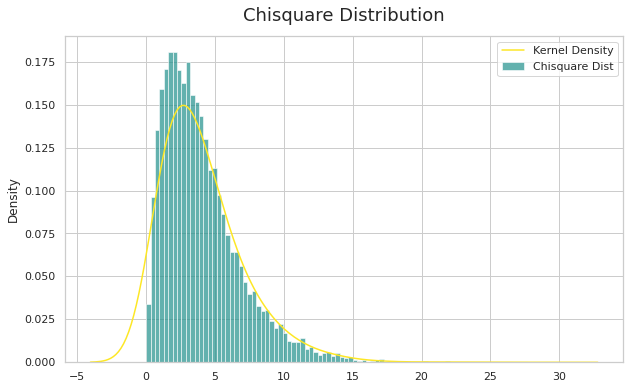

In [15]:
# set random number for reproducibility
np.random.seed(123)

# chisquare distribution -  df = Number of degrees of freedom. Must be positive.
s = np.random.chisquare(df=4, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','Chisquare Dist'])
plt.title("Chisquare Distribution")
plt.show(block=False)

### F Distribution
https://numpy.org/doc/stable/reference/random/generated/numpy.random.f.html

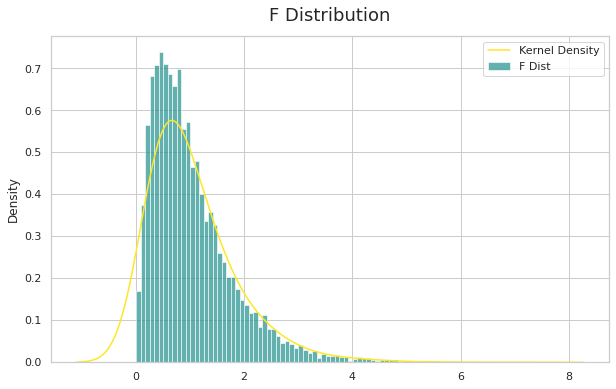

In [14]:
# set random number for reproducibility
np.random.seed(123)

# f distribution -  dfnum = degrees of freedom in numerator, dfden = degrees of freedom in denominator.
s = np.random.f(dfnum=4, dfden=50, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density','F Dist'])
plt.title("F Distribution")
plt.show(block=False)

### Students't Distribution
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_t.html

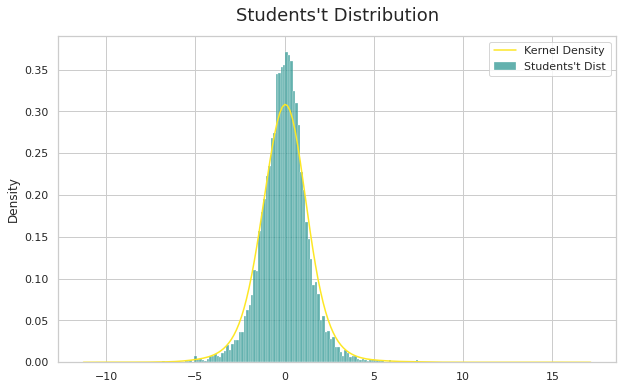

In [13]:
# set random number for reproducibility
np.random.seed(123)

# students't distribution -  df = Number of degrees of freedom. Must be positive.
s = np.random.standard_t(df=4, size=10000)

# plot
fig = plt.figure(figsize=(10,6))

ax = sns.histplot(data = s, stat='density', alpha=0.7, color='#21918c')
ax = sns.kdeplot(s, color='#fde725', bw_adjust=3)

plt.legend(labels=['Kernel Density',"Students't Dist"])
plt.title("Students't Distribution")
plt.show(block=False)

### Distributions plot

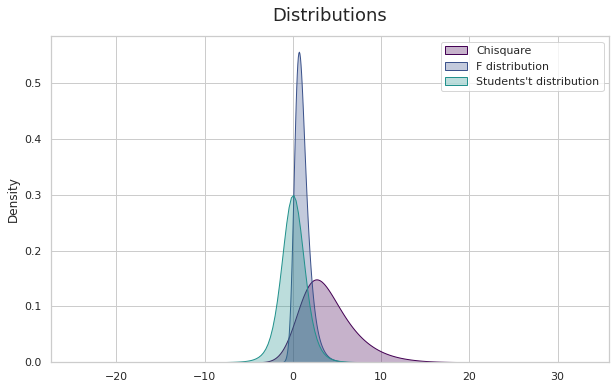

In [17]:
# set random number for reproducibility
np.random.seed(123)

# general params
size = 100000
bw_adjust=5

# chisquare distribution -  df = Number of degrees of freedom. Must be positive.
chi = np.random.chisquare(df=4, size=size)


# f distribution -  dfnum = degrees of freedom in numerator, dfden = degrees of freedom in denominator.
f = np.random.f(dfnum=4, dfden=50, size=size)

# students't distribution -  df = Number of degrees of freedom. Must be positive.
t = np.random.standard_t(df=4, size=size)

# plot
kde_list = [chi, f, t]
labels=['Chisquare','F distribution',"Students't distribution"]
viridis = cm.get_cmap('viridis', 5)

fig = plt.figure(figsize=(10,6))

for kde, color in zip(kde_list, viridis.colors):
    ax = sns.kdeplot(kde, color=color, bw_adjust=bw_adjust, fill=True, alpha=.3)

plt.legend(labels=labels)
plt.title("Distributions")
plt.show(block=False)